In [1]:
import pandas as pd
import numpy as np
import json
import datetime
import re #Expresiones regulares
import emoji 
import demoji 
import seaborn as sns
import matplotlib.pyplot as plt

# EDA: METADATA

En esta sección encontrarás la exploración de los datos metadata, es decir, de la información relacionado con los  establecimientos. 

Función para quitar emojis

In [2]:
def remove_emojis(text):
    return demoji.replace(text, '')

In [3]:
def remove_emojis_2(text):
    if type(text) == str:
        return demoji.replace(text, '')
    else:
        return None 

# Lecura de los archivos 

In [4]:
df1 = pd.read_json('../Archivos_originales/metadata-sitios/1.json', lines=True)
df2= pd.read_json('../Archivos_originales/metadata-sitios/2.json', lines=True)
df3 = pd.read_json('../Archivos_originales/metadata-sitios/3.json', lines=True)
df4 = pd.read_json('../Archivos_originales/metadata-sitios/4.json', lines=True)
df5 = pd.read_json('../Archivos_originales/metadata-sitios/5.json', lines=True)
df6 = pd.read_json('../Archivos_originales/metadata-sitios/6.json', lines=True)
df7 = pd.read_json('../Archivos_originales/metadata-sitios/7.json', lines=True)
df8 = pd.read_json('../Archivos_originales/metadata-sitios/8.json', lines=True)
df9 = pd.read_json('../Archivos_originales/metadata-sitios/9.json', lines=True)
df10 = pd.read_json('../Archivos_originales/metadata-sitios/10.json', lines=True)
df11= pd.read_json('../Archivos_originales/metadata-sitios/11.json', lines=True)

In [35]:
dataframes = [df1, df2, df3, df4, df5, df6, df7, df8, df9, df10, df11]
metadata = pd.concat(dataframes, ignore_index=True)
metadata

,name,address,gmap_id,description,latitude,longitude,category,avg_rating,num_of_reviews,price,hours,MISC,state,relative_results,url
0,Porter Pharmacy,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",0x88f16e41928ff687:0x883dad4fd048e8f8,None,32.388300,-83.357100,[Pharmacy],4.9,16,None,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...","{'Service options': ['In-store shopping', 'Sam...",Open ⋅ Closes 6PM,"[0x88f16e41929435cf:0x5b2532a2885e9ef6, 0x88f1...",https://www.google.com/maps/place//data=!4m2!3...
1,City Textile,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,None,34.018891,-118.215290,[Textile exporter],4.5,6,None,None,None,Open now,"[0x80c2c624136ea88b:0xb0315367ed448771, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
2,San Soo Dang,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",0x80c2c778e3b73d33:0xbdc58662a4a97d49,None,34.058092,-118.292130,[Korean restaurant],4.4,18,None,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...","{'Service options': ['Takeout', 'Dine-in', 'De...",Open ⋅ Closes 6PM,"[0x80c2c78249aba68f:0x35bf16ce61be751d, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
3,Nova Fabrics,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",0x80c2c89923b27a41:0x32041559418d447,None,34.023669,-118.232930,[Fabric store],3.3,6,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...","{'Service options': ['In-store shopping'], 'Pa...",Open ⋅ Closes 5PM,"[0x80c2c8811477253f:0x23a8a492df1918f7, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
4,Nobel Textile Co,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",0x80c2c632f933b073:0xc31785961fe826a6,None,34.036694,-118.249421,[Fabric store],4.3,7,None,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",{'Service options': ['In-store pickup']},Open ⋅ Closes 5PM,"[0x80c2c62c496083d1:0xdefa11317fe870a1, 0x80c2...",https://www.google.com/maps/place//data=!4m2!3...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3025006,Steak 48,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",0x89c6c74f43a49b55:0x6be6995921c58b12,None,39.947254,-75.164953,"[Steak house, Fine dining restaurant, Seafood ...",4.6,308,None,"[[Monday, 4–10PM], [Tuesday, 4–10PM], [Wednesd...","{'Service options': ['Takeout', 'Dine-in', 'De...",Closed ⋅ Opens 4PM,"[0x89c6c7af1a55f4f9:0x589bb93addf7fd95, 0x89c6...",https://www.google.com/maps/place//data=!4m2!3...
3025007,"Jack Mcnerney Chevrolet, Inc.","Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,None,42.788636,-76.122120,[Chevrolet dealer],4.4,143,None,"[[Monday, 8:30AM–7PM], [Tuesday, 8:30AM–7PM], ...","{'Service options': ['In-store shopping'], 'Of...",Open ⋅ Closes 7PM,"[0x89d98d228469e435:0x3fdc4fa72594151, 0x89d9e...",https://www.google.com/maps/place//data=!4m2!3...
3025008,Central Ny Spay Neuter Assista,"Central Ny Spay Neuter Assista, 17 Salisbury S...",0x89da6b9ce832726f:0xbd0d3630f1e3b42e,None,42.603831,-76.165286,[Veterinarian],4.3,88,None,None,{'Planning': ['Appointments recommended']},Open now,"[0x89da6c67512700cb:0x69892b3a9a648efe, 0x89d9...",https://www.google.com/maps/place//data=!4m2!3...
3025009,Ok Feed Store,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",0x88d9e872a9e39f3d:0x5de29f50507e5d73,None,25.491641,-80.456076,[Animal feed store],4.9,13,None,"[[Monday, 9AM–6PM], [Tuesday, 9AM–6PM], [Wedne...","{'Service options': ['Curbside pickup', 'In-st...",Open ⋅ Closes 6PM,"[0x88d9e86cb955da7b:0xeda838b28926c524, 0x88d9...",https://www.google.com/maps/place//data=!4m2!3...


# Verificación de nulos

In [36]:
metadata.isnull().sum()

name                     37
address               80511
gmap_id                   0
description         2770722
latitude                  0
longitude                 0
category              17419
avg_rating                0
num_of_reviews            0
price               2749808
hours                787405
MISC                 690834
state                746455
relative_results     295058
url                       0
dtype: int64

# Tipo de dato de c/columna

In [10]:
metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 275001 entries, 0 to 275000
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   name              274994 non-null  object 
 1   address           264939 non-null  object 
 2   gmap_id           275001 non-null  object 
 3   description       13155 non-null   object 
 4   latitude          275001 non-null  float64
 5   longitude         275001 non-null  float64
 6   category          272740 non-null  object 
 7   avg_rating        275001 non-null  float64
 8   num_of_reviews    275001 non-null  int64  
 9   price             13450 non-null   object 
 10  hours             192448 non-null  object 
 11  MISC              194972 non-null  object 
 12  state             195523 non-null  object 
 13  relative_results  238771 non-null  object 
 14  url               275001 non-null  object 
dtypes: float64(3), int64(1), object(11)
memory usage: 31.5+ MB


# Máximos y Mínimos para las variables numéricas

In [37]:
print('Máximo avg_rating', metadata.avg_rating.max())
print('Mínimo avg_rating', metadata.avg_rating.min())
print('Máximo num_of_reviews', metadata.num_of_reviews.max())
print('Mínimo num_of_reviews', metadata.num_of_reviews.min())

Máximo avg_rating 5.0
Mínimo avg_rating 1.0
Máximo num_of_reviews 9998
Mínimo num_of_reviews 1


# Total de reviews por local

In [ ]:
grupo_id = df1.groupby('gmap_id')
media_por_categoria = grupo_id['num_of_reviews'].sum()
media_por_categoria

# Correlación entre variables

Matriz de correlación


In [11]:
correlation_matrix = metadata.corr()

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_7832\2633924411.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df1.corr()


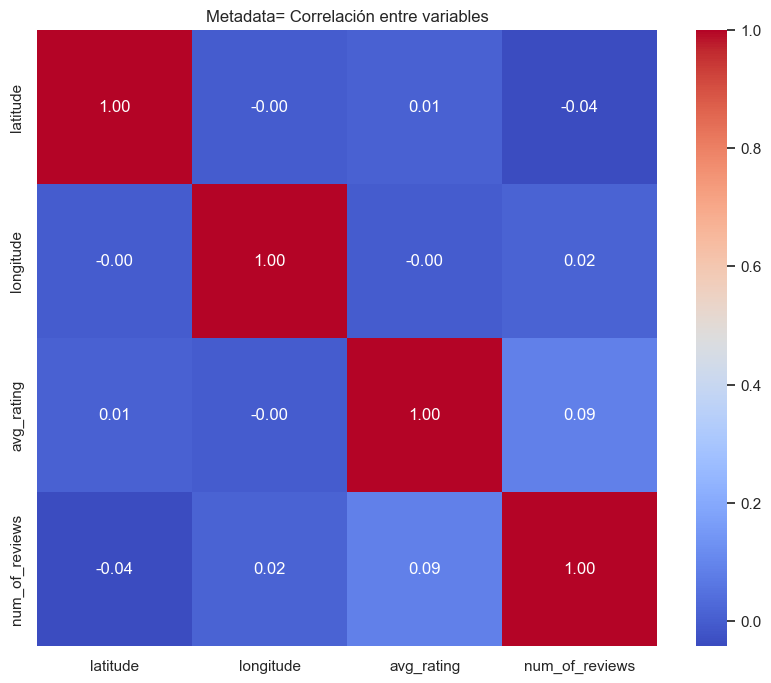

In [15]:
sns.set(style="white") 
plt.figure(figsize=(10, 8))  

sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Metadata= Correlación entre variables")
plt.show()


# Distribución de Variables categóricas

Calificación Promedio

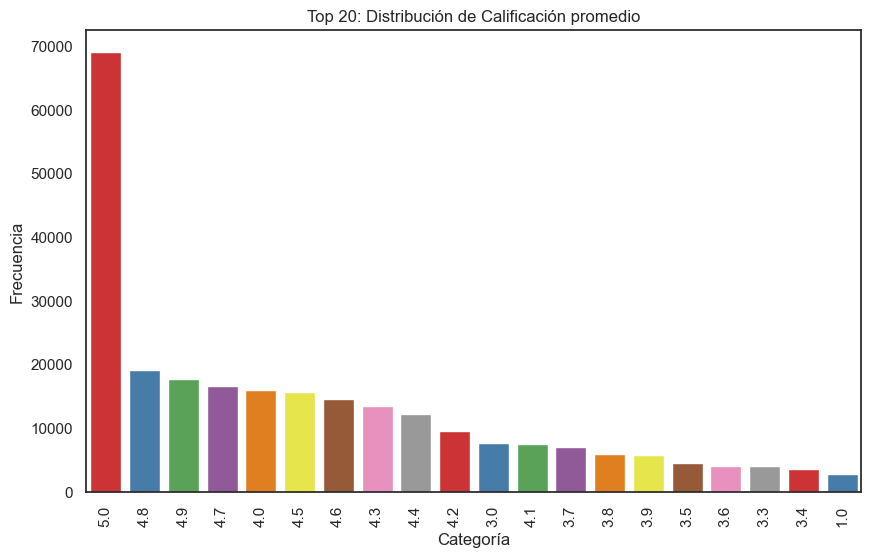

In [33]:
top_20 = metadata['avg_rating'].value_counts().head(20).index
df_top20_rating= metadata[metadata['avg_rating'].isin(top_20)]


plt.figure(figsize=(10, 6))
sns.countplot(data=df_top20_rating, x='avg_rating', palette='Set1',order=top_20)
plt.title('Top 20: Distribución de Calificación promedio')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) 
plt.show()

Número de Reviews por Establecimiento

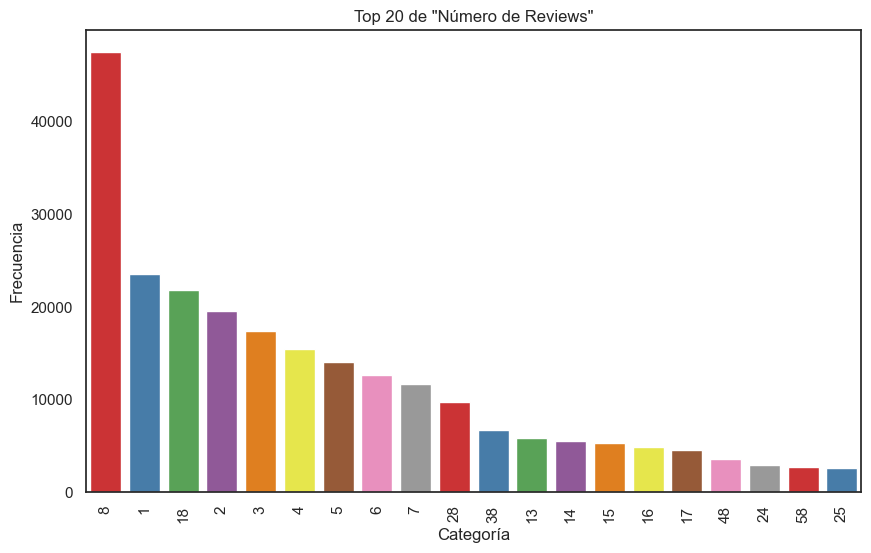

In [34]:
top_20_categories = metadata['num_of_reviews'].value_counts().head(20).index
df_top20= metadata[metadata['num_of_reviews'].isin(top_20_categories)]


plt.figure(figsize=(10, 6))
sns.countplot(data=df_top20, x='num_of_reviews', palette='Set1',order=top_20_categories)
plt.title('Top 20 de "Número de Reviews"')
plt.xlabel('Categoría')
plt.ylabel('Frecuencia')
plt.xticks(rotation=90) 
plt.show()

Selección de columnas con las que se va a trabajar

In [34]:
metadata=metadata[['name','gmap_id','address','avg_rating','category','hours','num_of_reviews']]

Se eliminan los nulos para la columna name

In [35]:
metadata = metadata.dropna(subset=['name'])

In [36]:
metadata.isnull().sum()

name                   0
gmap_id                0
address            80474
avg_rating             0
category           17417
hours             787368
num_of_reviews         0
dtype: int64

In [16]:
metadata[metadata['name']=="Domino's"]

,name,gmap_id,address,avg_rating,category,hours,num_of_reviews
51369,Domino's,0x865c92bc590b4df1:0xe8c9f208022b15fc,"Domino's, 1001 Pat Booker Rd, Universal City, ...",4.0,[Association or organization],None,3
206964,Domino's,0x54c43931a64f2c59:0x47cd469e47b83c34,"Domino's, 160 N Main St, Winston, OR 97496",4.1,[Restaurant],"[[Monday, 10:30AM–1AM], [Tuesday, 10:30AM–1AM]...",38


Columna Category.Para cada dato que es lista se convierte a texto. 

In [37]:
metadata['category'] = metadata['category'].apply(lambda x: ', '.join(x) if x is not None else '')
metadata

,name,gmap_id,address,avg_rating,category,hours,num_of_reviews
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",4.9,Pharmacy,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun...",16
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",4.5,Textile exporter,None,6
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",4.4,Korean restaurant,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],...",18
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",3.3,Fabric store,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",6
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",4.3,Fabric store,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu...",7
...,...,...,...,...,...,...,...
3025006,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",4.6,"Steak house, Fine dining restaurant, Seafood r...","[[Monday, 4–10PM], [Tuesday, 4–10PM], [Wednesd...",308
3025007,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",4.4,Chevrolet dealer,"[[Monday, 8:30AM–7PM], [Tuesday, 8:30AM–7PM], ...",143
3025008,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"Central Ny Spay Neuter Assista, 17 Salisbury S...",4.3,Veterinarian,None,88
3025009,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",4.9,Animal feed store,"[[Monday, 9AM–6PM], [Tuesday, 9AM–6PM], [Wedne...",13


# Verificación de Duplicados

Se tuvo que quitar la columna 'hours' (ya que es un diccionario) para poder hacer la verificación 

In [38]:
metadata_2 = metadata[['name', 'gmap_id', 'address', 'avg_rating', 'category',
       'num_of_reviews']]
metadata_2

,name,gmap_id,address,avg_rating,category,num_of_reviews
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",4.9,Pharmacy,16
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",4.5,Textile exporter,6
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",4.4,Korean restaurant,18
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",3.3,Fabric store,6
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",4.3,Fabric store,7
...,...,...,...,...,...,...
3025006,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",4.6,"Steak house, Fine dining restaurant, Seafood r...",308
3025007,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",4.4,Chevrolet dealer,143
3025008,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"Central Ny Spay Neuter Assista, 17 Salisbury S...",4.3,Veterinarian,88
3025009,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",4.9,Animal feed store,13


In [39]:
metadata_2.duplicated().sum()

26583

Visualizar los registros que están duplicados

In [13]:
metadata_2[metadata_2.duplicated(keep='first')]

,name,gmap_id,address,avg_rating,category,num_of_reviews
275001,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",4.9,Pharmacy,16
275002,Mcguinns store,0x88575f0654bd7c03:0xca3e467f7e766ad5,"Mcguinns store, 4884 NC-9, Mill Spring, NC 28756",5.0,"General store, ATM",4
275003,Gentle Hands Grooming,0x8859db7fe56d01c7:0xf90f3bdb3c62ba47,"Gentle Hands Grooming, 156 US-176, Saluda, NC ...",4.9,Pet groomer,8
275004,Smokecignals Electronic Cigarettes,0x862722f489700e87:0x62c847c188bd5aa9,"Smokecignals Electronic Cigarettes, 2108 W Tho...",4.4,Vaporizer store,57
275005,Advanced Home Medical Equipment,0x88523ca20145acc7:0x4b61a60bdc7d641e,"Advanced Home Medical Equipment, 885 Franklin ...",4.8,Medical supply store,228
...,...,...,...,...,...,...
549997,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",4.6,"Steak house, Fine dining restaurant, Seafood r...",308
549998,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",4.4,Chevrolet dealer,143
549999,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"Central Ny Spay Neuter Assista, 17 Salisbury S...",4.3,Veterinarian,88
550000,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",4.9,Animal feed store,13


Eliminamos los duplicados

In [40]:
metadata_2.drop_duplicates(inplace=True)
metadata_2

C:\Users\Jocelyn\AppData\Local\Temp\ipykernel_3784\1033082581.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metadata_2.drop_duplicates(inplace=True)


,name,gmap_id,address,avg_rating,category,num_of_reviews
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",4.9,Pharmacy,16
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",4.5,Textile exporter,6
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",4.4,Korean restaurant,18
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",3.3,Fabric store,6
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",4.3,Fabric store,7
...,...,...,...,...,...,...
3025006,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",4.6,"Steak house, Fine dining restaurant, Seafood r...",308
3025007,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",4.4,Chevrolet dealer,143
3025008,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"Central Ny Spay Neuter Assista, 17 Salisbury S...",4.3,Veterinarian,88
3025009,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",4.9,Animal feed store,13


In [16]:
metadata_2.duplicated().sum()

0

In [17]:
metadata_2[metadata_2['name']=='Advanced Home Medical Equipment']

,name,gmap_id,address,avg_rating,category,num_of_reviews
4,Advanced Home Medical Equipment,0x88523ca20145acc7:0x4b61a60bdc7d641e,"Advanced Home Medical Equipment, 885 Franklin ...",4.8,Medical supply store,228


In [41]:
resultado = metadata_2.merge(metadata['hours'], left_index=True, right_index=True)
resultado

,name,gmap_id,address,avg_rating,category,num_of_reviews,hours
0,Porter Pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"Porter Pharmacy, 129 N Second St, Cochran, GA ...",4.9,Pharmacy,16,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun..."
1,City Textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"City Textile, 3001 E Pico Blvd, Los Angeles, C...",4.5,Textile exporter,6,None
2,San Soo Dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"San Soo Dang, 761 S Vermont Ave, Los Angeles, ...",4.4,Korean restaurant,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],..."
3,Nova Fabrics,0x80c2c89923b27a41:0x32041559418d447,"Nova Fabrics, 2200 E 11th St, Los Angeles, CA ...",3.3,Fabric store,6,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu..."
4,Nobel Textile Co,0x80c2c632f933b073:0xc31785961fe826a6,"Nobel Textile Co, 719 E 9th St, Los Angeles, C...",4.3,Fabric store,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu..."
...,...,...,...,...,...,...,...
3025006,Steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"Steak 48, 260 S Broad St, Philadelphia, PA 19102",4.6,"Steak house, Fine dining restaurant, Seafood r...",308,"[[Monday, 4–10PM], [Tuesday, 4–10PM], [Wednesd..."
3025007,"Jack Mcnerney Chevrolet, Inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"Jack Mcnerney Chevrolet, Inc., 363 NY-281, Tul...",4.4,Chevrolet dealer,143,"[[Monday, 8:30AM–7PM], [Tuesday, 8:30AM–7PM], ..."
3025008,Central Ny Spay Neuter Assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"Central Ny Spay Neuter Assista, 17 Salisbury S...",4.3,Veterinarian,88,None
3025009,Ok Feed Store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"Ok Feed Store, 16300 SW 296th St, Homestead, F...",4.9,Animal feed store,13,"[[Monday, 9AM–6PM], [Tuesday, 9AM–6PM], [Wedne..."


In [20]:
resultado.isna().sum()

name                  0
gmap_id               0
address            4753
avg_rating            0
category              0
num_of_reviews        0
hours             56665
dtype: int64

Se quitan los emojis y todo a minúsculas para las columnas name,category y address

In [42]:
resultado['name']= resultado['name'].apply(remove_emojis)
resultado['category']=resultado['category'].apply(remove_emojis)
resultado['address']=resultado['address'].apply(remove_emojis_2)
resultado['name']=resultado['name'].apply(lambda x: x.lower())
resultado['category']=resultado['category'].apply(lambda x: x.lower() if x is not None else '')
resultado['address']=resultado['address'].apply(lambda x: x.lower() if x is not None else '')
resultado 

,name,gmap_id,address,avg_rating,category,num_of_reviews,hours
0,porter pharmacy,0x88f16e41928ff687:0x883dad4fd048e8f8,"porter pharmacy, 129 n second st, cochran, ga ...",4.9,pharmacy,16,"[[Friday, 8AM–6PM], [Saturday, 8AM–12PM], [Sun..."
1,city textile,0x80c2c98c0e3c16fd:0x29ec8a728764fdf9,"city textile, 3001 e pico blvd, los angeles, c...",4.5,textile exporter,6,None
2,san soo dang,0x80c2c778e3b73d33:0xbdc58662a4a97d49,"san soo dang, 761 s vermont ave, los angeles, ...",4.4,korean restaurant,18,"[[Thursday, 6:30AM–6PM], [Friday, 6:30AM–6PM],..."
3,nova fabrics,0x80c2c89923b27a41:0x32041559418d447,"nova fabrics, 2200 e 11th st, los angeles, ca ...",3.3,fabric store,6,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu..."
4,nobel textile co,0x80c2c632f933b073:0xc31785961fe826a6,"nobel textile co, 719 e 9th st, los angeles, c...",4.3,fabric store,7,"[[Thursday, 9AM–5PM], [Friday, 9AM–5PM], [Satu..."
...,...,...,...,...,...,...,...
3025006,steak 48,0x89c6c74f43a49b55:0x6be6995921c58b12,"steak 48, 260 s broad st, philadelphia, pa 19102",4.6,"steak house, fine dining restaurant, seafood r...",308,"[[Monday, 4–10PM], [Tuesday, 4–10PM], [Wednesd..."
3025007,"jack mcnerney chevrolet, inc.",0x89da1787d3fdc4a5:0xce92ea6e3cd4d1cc,"jack mcnerney chevrolet, inc., 363 ny-281, tul...",4.4,chevrolet dealer,143,"[[Monday, 8:30AM–7PM], [Tuesday, 8:30AM–7PM], ..."
3025008,central ny spay neuter assista,0x89da6b9ce832726f:0xbd0d3630f1e3b42e,"central ny spay neuter assista, 17 salisbury s...",4.3,veterinarian,88,None
3025009,ok feed store,0x88d9e872a9e39f3d:0x5de29f50507e5d73,"ok feed store, 16300 sw 296th st, homestead, f...",4.9,animal feed store,13,"[[Monday, 9AM–6PM], [Tuesday, 9AM–6PM], [Wedne..."


In [43]:
resultado.isna().sum()

name                   0
gmap_id                0
address                0
avg_rating             0
category               0
num_of_reviews         0
hours             779476
dtype: int64

In [23]:
resultado[resultado['address']== '']

,name,gmap_id,address,avg_rating,category,num_of_reviews,hours
72,verizon fios,0x89e370869bdb88cf:0xaf933b698d47b388,,1.8,satellite communication service,16,"[[Wednesday, 8AM–8PM], [Thursday, 8AM–8PM], [F..."
116,discusflogrown llc,0x88e8018d1a0e47bd:0x8d0d360b1dca1bec,,5.0,tropical fish store,7,"[[Wednesday, 12–9PM], [Thursday, 12–9PM], [Fri..."
150,mow managers fort worth lawn care service,0x864dd98e59934371:0x8159e9067a27f76c,,4.6,"lawn care service, service establishment",133,"[[Wednesday, 9AM–5PM], [Thursday, 9AM–5PM], [F..."
158,a-schuerr-thing horsemanship,0x80cddbf1db9d9ef9:0xb240aac23c022186,,5.0,"horseback riding service, horse trainer",4,None
167,hearth house,0x864e62d2f8d3b505:0xc8d43fd8e54df1b7,,3.9,"fireplace store, service establishment, gas lo...",8,"[[Wednesday, 10AM–5PM], [Thursday, 10AM–5PM], ..."
...,...,...,...,...,...,...,...
274583,newport beach taxi cab service,0x80dce0d5a3e81d73:0x2792247a38a76143,,4.6,"taxi service, courier service, service establi...",8,None
274589,cheaper than a dui taxi cab,0x80dcd965721bd24d:0xca5057a902e98951,,4.5,"taxi service, airport shuttle service, chauffe...",47,None
274596,pier yellow cab,0x80dcdff2ac6f2967:0x3c5f078fc2baf64e,,4.3,"taxi service, airport shuttle service, chauffe...",4,None
274674,bubbles coin laundry,0x88d9b654916c3057:0xc4d59ff45545fcc7,,4.7,"laundromat, service establishment",25,"[[Monday, 8AM–9PM], [Tuesday, 8AM–9PM], [Wedne..."


Se cuenta el número de sucursales que tiene cada negocio

In [25]:
y=metadata_2.groupby(by=['category']).count()
y

,name,gmap_id,address,avg_rating,num_of_reviews
category,,,,,
,982,982,982,982,982
ATM,276,276,276,276,276
"ATM, Bank, Bank or ATM",2,2,2,2,2
"ATM, Bank, Bank or ATM, Convenience store",1,1,1,1,1
"ATM, Bank, Credit union, Financial consultant",3,3,3,3,3
...,...,...,...,...,...
"Youth social services organization, Ranch",1,1,1,1,1
Zoo,20,20,20,20,20
"Zoo, Education center, Tourist attraction",1,1,1,1,1


+ Se exporta a csv

In [44]:
resultado.to_csv('df_metadata_limpia.csv', index=False)

Se crea una función para leer todos los archivos por estado y unirlos en un único dataframe